In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [2]:
### READING FILES
outputs_path = "C:\\Users\Ania\\Desktop\\ClimateChange\\outputs\\"

## TEST
test = pd.read_csv(filepath_or_buffer=outputs_path + 'test.csv', sep=',')

## ARIMA
arima_fcst = pd.read_csv(filepath_or_buffer=outputs_path + 'ARIMA_forecast.csv', sep=',')

## PROPHET
prophet_fcst = pd.read_csv(filepath_or_buffer=outputs_path + 'PROPHET_forecast.csv', sep=',')


In [3]:
#Merge ARIMA forecast with test
arima_test_merged = pd.merge(arima_fcst, test, on='dt', how='outer')

#Merge PROPHET forecast with test
prophet_test_merged = pd.merge(prophet_fcst, test, on='dt', how='outer')


In [4]:
arima_test_fcst_recent_years = arima_test_merged.loc[
    (arima_test_merged['dt'] >= '2011-01-01') & (arima_test_merged['dt'] <= '2013-08-01'),
    ['dt', 'AverageTemperatureByCountry', 'Forecast', 'Country']
]

In [5]:
prophet_test_fcst_recent_years = prophet_test_merged.loc[
    (prophet_test_merged['dt'] >= '2011-01-01') & (prophet_test_merged['dt'] <= '2013-08-01'),
    ['dt', 'AverageTemperatureByCountry', 'Forecast', 'Country']
]

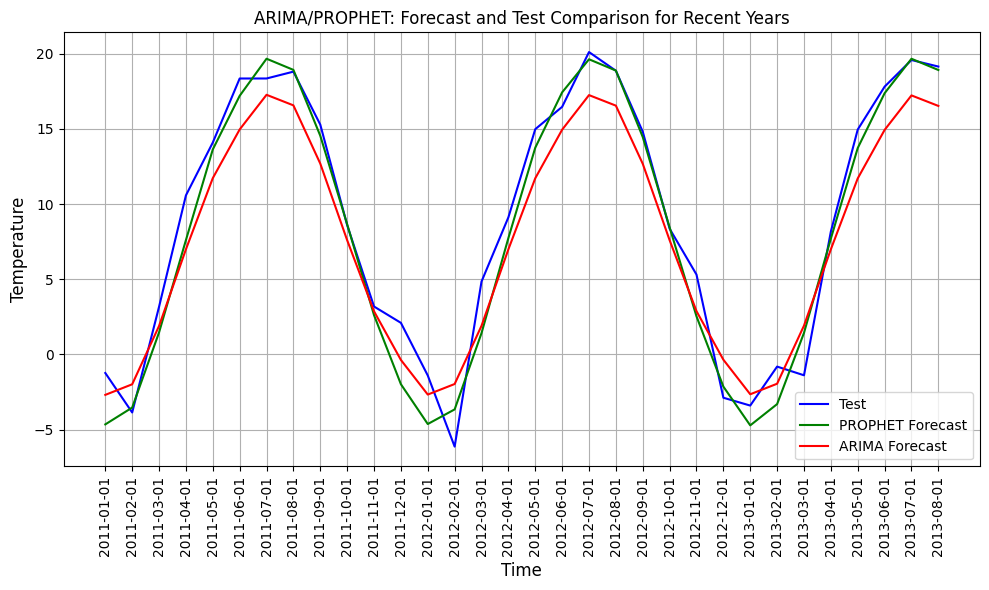

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    arima_test_fcst_recent_years['dt'],
    arima_test_fcst_recent_years['AverageTemperatureByCountry'],
    color="blue",
    label="Test"
)

ax.plot(
    prophet_test_fcst_recent_years['dt'],
    prophet_test_fcst_recent_years['Forecast'],
    color="green",
    label="PROPHET Forecast"
)

ax.plot(
    arima_test_fcst_recent_years['dt'],
    arima_test_fcst_recent_years['Forecast'],
    color="red",
    label="ARIMA Forecast"
)

ax.set_title(
    'ARIMA/PROPHET: Forecast and Test Comparison for Recent Years',
    fontsize=12,
)

ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.xaxis.set_tick_params(labelrotation=90)
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.grid()

# Show legend
ax.legend()

plt.tight_layout()
plt.show()

In [7]:
arima_test_fcst_first_years = arima_test_merged.loc[
    (arima_test_merged['dt'] >= '1960-12-01') & (arima_test_merged['dt'] <= '1963-08-01'),
    ['dt', 'AverageTemperatureByCountry', 'Forecast', 'Country']
]

In [8]:
prophet_test_fcst_first_years = prophet_test_merged.loc[
    (prophet_test_merged['dt'] >= '1960-12-01') & (prophet_test_merged['dt'] <= '1963-08-01'),
    ['dt', 'AverageTemperatureByCountry', 'Forecast', 'Country']
]

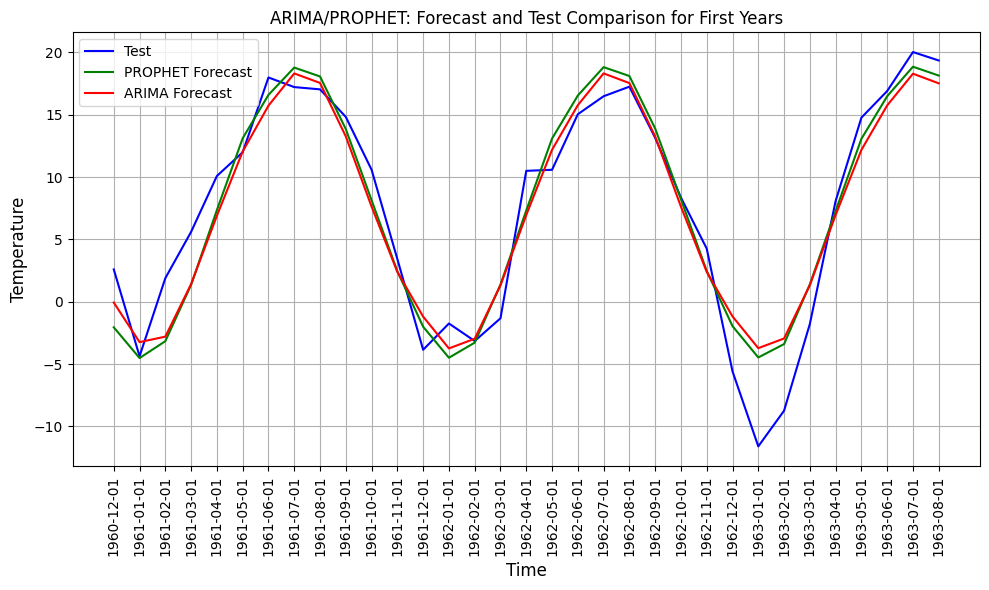

In [9]:
#ARIMA_PROPHET_FIRST_YEARS plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    arima_test_fcst_first_years['dt'],
    arima_test_fcst_first_years['AverageTemperatureByCountry'],
    color="blue",
    label="Test"
)

ax.plot(
    prophet_test_fcst_first_years['dt'],
    prophet_test_fcst_first_years['Forecast'],
    color="green",
    label="PROPHET Forecast"
)

ax.plot(
    arima_test_fcst_first_years['dt'],
    arima_test_fcst_first_years['Forecast'],
    color="red",
    label="ARIMA Forecast"
)

ax.set_title(
    'ARIMA/PROPHET: Forecast and Test Comparison for First Years',
    fontsize=12,
)

ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.xaxis.set_tick_params(labelrotation=90)
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.grid()

# Show legend
ax.legend()

plt.tight_layout()
plt.show()